In [1]:
from mnist import MNIST
import numpy as np
from scipy import linalg
import random
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import torch


In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
mndata = MNIST('./data/')
x_train, y_train = map(np.array, mndata.load_training())
x_test, y_test = map(np.array, mndata.load_testing())
x_train = torch.FloatTensor(x_train/255.0)
y_train = torch.tensor(y_train)
x_test = torch.FloatTensor(x_test/255.0)
y_test = torch.tensor(y_test)

In [3]:
def one_hot(labels):
    k = labels.max() + 1
    return torch.tensor([np.eye(k)[i] for i in labels])

In [4]:
def autoencoder(x_train, y_train,x_test,y_test,h):
    #W_0,W_1,b_0,b_1 = init_W()
    print("finish initialization",flush = True)
    d = 784
    loss_prev = 0
    d_loss = 1
    loss = 1
    neural_network = torch.nn.Sequential(
                            torch.nn.Linear(d,h), 
                            torch.nn.Linear(h,d),
                            )

    loss_func = torch.nn.MSELoss()
    torch.nn.init.kaiming_normal_(neural_network[0].weight)
    optim = torch.optim.Adam(neural_network.parameters(), lr=1e-3)
    i = 0 
    while abs(d_loss) > 1e-5:
        i = i+1
        x_hat = neural_network(x_train)
        loss = torch.nn.functional.mse_loss(x_hat, x_train.float())
        d_loss = loss - loss_prev
        loss_prev = loss
        optim.zero_grad()
        loss.backward()
        optim.step()
        #print('{}:{}'.format(i, loss.item()))
    #visualize the plot
    print("h = {}, loss ={},epoch = {}, without activation layer".format(h,loss,i))
    x_test_hat = neural_network(x_test)
    loss = torch.nn.functional.mse_loss(x_test_hat, x_test.float())
    print("h ={},loss={}".format(h,loss))
    number = [0,1,2,3,4,5,6,7,8,9]
    fig = plt.figure(figsize=(10, 8))
    sns.set()
    for i in number:
        result = np.where(y_train == i)
        x_i = x_train[result[0][0]].reshape(1,x_train.shape[1])
        cur_ax = fig.add_subplot(5, 4,2*i+1)
        sns.heatmap(x_i.reshape((28,28)), cbar=False, ax=cur_ax)
        cur_ax.get_xaxis().set_visible(False)
        cur_ax.get_yaxis().set_visible(False)
        cur_ax.set_title('number = {}'.format(i),fontsize=8)
        x_hat_i = neural_network(x_i)
        x_hat_i = x_hat_i.detach().numpy()
        cur_ax = fig.add_subplot(5, 4,2*i+2)
        sns.heatmap(x_hat_i.reshape((28,28)), cbar=False, ax=cur_ax)
        cur_ax.get_xaxis().set_visible(False)
        cur_ax.get_yaxis().set_visible(False)
        cur_ax.set_title('reconstruct number = {}'.format(i),fontsize=8)
        plt.savefig("./a3a_{}.png".format(h))

    

In [5]:
def autoencoder2(x_train, y_train,x_test,y_test,h):
    print("finish initialization",flush = True)
    d = 784
    k = 10
    loss_prev = 1
    d_loss = 1
    loss = 1
    accuracy = 0
    ep = 0
    neural_network = torch.nn.Sequential(
                            torch.nn.Linear(d,h), 
                            torch.nn.ReLU(),
                            torch.nn.Linear(h,d),
                            torch.nn.ReLU(),
                            )

    loss_func = torch.nn.MSELoss()
    torch.nn.init.kaiming_normal_(neural_network[0].weight)
    optim = torch.optim.Adam(neural_network.parameters(), lr=1e-3)
    i = 0 
    while abs(d_loss) > 1e-5:
        i = i+1
        x_hat = neural_network(x_train)
        loss = torch.nn.functional.mse_loss(x_hat, x_train.float())
        d_loss = loss_prev - loss
        loss_prev = loss
        optim.zero_grad()
        loss.backward()
        optim.step()
        #print('{}:{}:{}'.format(i, loss.item(),d_loss))
    #visualize the plot
    print("h = {}, loss ={},epoch = {}".format(h,loss,i))
    x_test_hat = neural_network(x_test)
    loss = torch.nn.functional.mse_loss(x_test_hat, x_test.float())
    print("h ={},loss={}".format(h,loss))
    number = [0,1,2,3,4,5,6,7,8,9]
    fig = plt.figure(figsize=(10, 8))
    sns.set()
    for i in number:
        result = np.where(y_train == i)
        x_i = x_train[result[0][0]].reshape(1,x_train.shape[1])
        cur_ax = fig.add_subplot(5, 4,2*i+1)
        sns.heatmap(x_i.reshape((28,28)), cbar=False, ax=cur_ax)
        cur_ax.get_xaxis().set_visible(False)
        cur_ax.get_yaxis().set_visible(False)
        cur_ax.set_title('number = {}'.format(i),fontsize=8)
        x_hat_i = neural_network(x_i)
        x_hat_i = x_hat_i.detach().numpy()
        cur_ax = fig.add_subplot(5, 4,2*i+2)
        sns.heatmap(x_hat_i.reshape((28,28)), cbar=False, ax=cur_ax)
        cur_ax.get_xaxis().set_visible(False)
        cur_ax.get_yaxis().set_visible(False)
        cur_ax.set_title('reconstruct number = {}'.format(i),fontsize=8)
        plt.savefig("./a3b_{}.png".format(h))

    

In [6]:
h_list = [32,64,128]

finish initialization
h = 32, loss =0.019606519490480423,epoch = 686, without activation layer
h =32,loss=0.01920958422124386
finish initialization
h = 32, loss =0.015765715390443802,epoch = 537
h =32,loss=0.01537057664245367
finish initialization
h = 64, loss =0.011768681928515434,epoch = 561, without activation layer
h =64,loss=0.011503618210554123
finish initialization
h = 64, loss =0.010386696085333824,epoch = 365
h =64,loss=0.010164543054997921
finish initialization
h = 128, loss =0.007213166914880276,epoch = 476, without activation layer
h =128,loss=0.007071377243846655
finish initialization
h = 128, loss =0.007573047652840614,epoch = 240
h =128,loss=0.007394117768853903


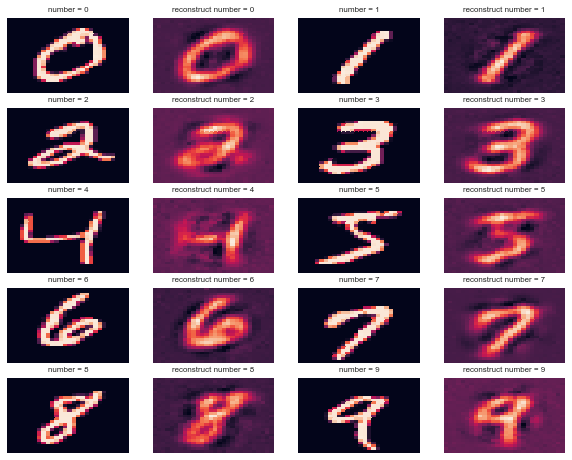

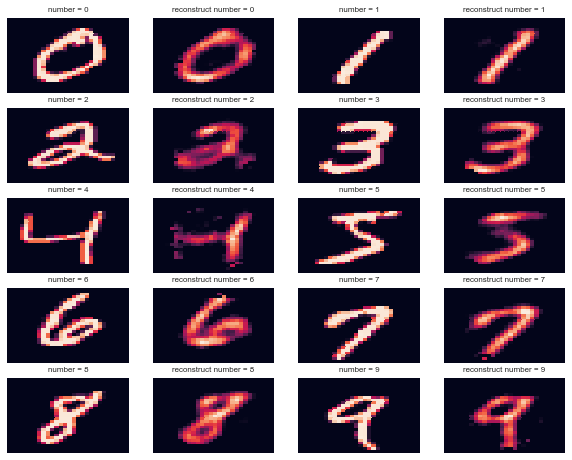

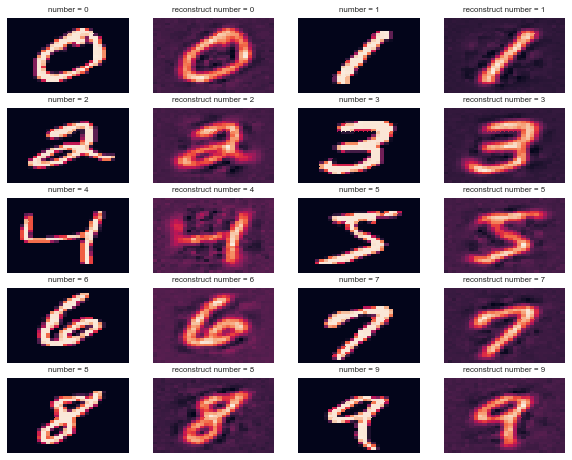

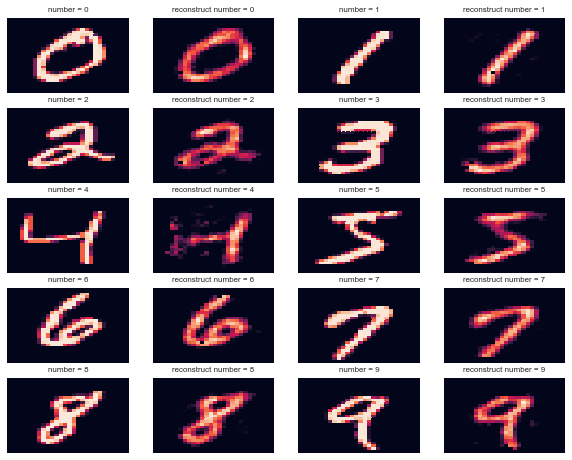

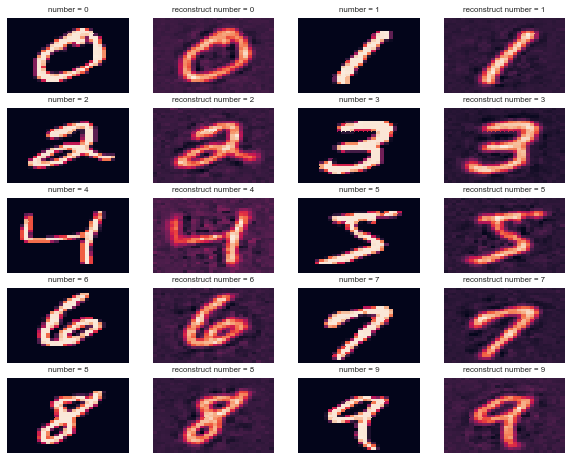

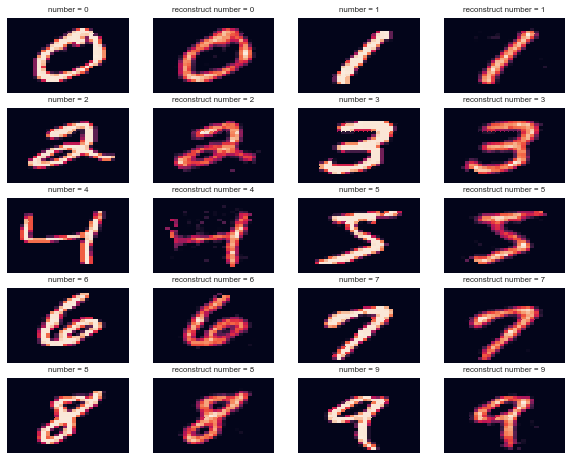

In [7]:

for h in h_list:
    autoencoder(x_train, y_train,x_test,y_test,h)
    autoencoder2(x_train, y_train,x_test,y_test,h)

In [202]:
mndata = MNIST('./data/')
x_train, y_train = map(np.array, mndata.load_training())
x_test, y_test = map(np.array, mndata.load_testing())
x_train = x_train/255.0
x_test = x_test/255.0
y_train = y_train.reshape(y_train.shape[0],1)
y_test = y_test.reshape(y_test.shape[0],1)

In [237]:
def reconstruction_error(k,x_train,x_test):
    u = np.mean(x_train, axis = 0).reshape(x_train.shape[1],1)
    SIGMA = ((x_train-u.T).T.dot(x_train-u.T))/60000
    eigenvalue, eigenvectors = np.linalg.eig(SIGMA)
    eigenvectors = eigenvectors[:,np.argsort(-eigenvalue)]
    eigenvalue = eigenvalue[np.argsort(-eigenvalue)]
    V = eigenvectors[:,:k]
    V= V.reshape(x_train.shape[1],k)
    m_train = (x_train-u.T).T-V.dot(V.T).dot((x_train-u.T).T)
    #print(m_train.shape)
    #print((np.linalg.norm(m_train,axis = 0)**2).shape)
    recon_error_train = np.mean(np.linalg.norm(m_train,axis = 0)**2)
    m_test = (x_test-u.T).T-V.dot(V.T).dot((x_test-u.T).T)
    recon_error_test = np.mean(np.linalg.norm(m_test,axis = 0)**2)
    print("k: {}, reconstruction_error_train: {}".format(k,recon_error_train))
    print("k: {}, reconstruction_error_test: {}".format(k,recon_error_test))
    return recon_error_train, recon_error_test

In [240]:
for h in h_list:
    reconstruction_error(h,x_train,x_test)

k: 32, reconstruction_error_train: 13.518388662871882
k: 32, reconstruction_error_test: 13.193336224658438
k: 64, reconstruction_error_train: 7.278550370509724
k: 64, reconstruction_error_test: 7.092688346787545
k: 128, reconstruction_error_train: 3.3493069792827814
k: 128, reconstruction_error_test: 3.296981707219736
